<a href="https://colab.research.google.com/github/Vampiref10/2_Terminal_Hacker/blob/main/Project2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
data = pd.read_csv('covid_19_data.csv')

In [ ]:
#Percentage of NAN Values
NAN = [(c, data[c].isna().mean()*100) for c in data]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,SNo,0.000000
1,ObservationDate,0.000000
2,Province/State,34.605089
3,Country/Region,0.001325
4,Last Update,0.001325
5,Confirmed,0.001325
6,Deaths,0.001325
7,Recovered,0.001325


In [ ]:
data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [ ]:
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [ ]:
data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the word : ',
)
fig.show()

In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',marker_color='red',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='red',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
DS = data [(data['Country/Region'] == 'Saudi Arabia') ].reset_index(drop=True)
DS.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case
0,3063,03/02/2020,NaN,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
1,3212,03/03/2020,NaN,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
2,3374,03/04/2020,NaN,Saudi Arabia,2020-03-02T23:53:02,1.0,0.0,0.0,1.0
3,3485,03/05/2020,NaN,Saudi Arabia,2020-03-05T17:53:03,5.0,0.0,0.0,5.0
4,3667,03/06/2020,NaN,Saudi Arabia,2020-03-05T17:53:03,5.0,0.0,0.0,5.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Active_case'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Deaths'],name='Deaths',
                                   marker_color='Gray',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=DS['ObservationDate'], y=DS['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in Saudi Arabia',
        template='plotly_dark'

)

fig.show()

In [ ]:
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np


In [ ]:
DS.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
Active_case        float64
dtype: object

In [ ]:
DS['Recovered'] = DS.Recovered.astype(float)

In [ ]:
DSS = DS[['Confirmed','Deaths','Recovered','Active_case']]

In [ ]:
DSS.dtypes

Confirmed      float64
Deaths         float64
Recovered      float64
Active_case    float64
dtype: object

In [ ]:
train_size = int(len(DSS)*0.7)
test_size = len(DSS) - train_size
train, test = DSS.iloc[0:train_size], DSS.iloc[train_size:len(DSS)]
print(len(train), len(test))

105 46


In [ ]:
from sklearn.preprocessing import RobustScaler
f_columns = ['Confirmed', 'Active_case', 'Recovered']
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)
Deaths_case_transformer = RobustScaler()
Deaths_case_transformer = Deaths_case_transformer.fit(train[['Deaths']])
train['Deaths'] = Deaths_case_transformer.transform(train[['Deaths']])
test['Deaths'] = Deaths_case_transformer.transform(test[['Deaths']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is 

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.Deaths, time_steps)
X_test, y_test = create_dataset(test, test.Deaths, time_steps)
print(X_train.shape, y_train.shape,)
print(X_test.shape,y_test.shape)

(95, 10, 4) (95,)
(36, 10, 4) (36,)


Epoch 1/200
3/3 [==============================] - 5s 427ms/step - loss: 0.0779 - val_loss: 0.8885
Epoch 2/200
3/3 [==============================] - 0s 41ms/step - loss: 0.0101 - val_loss: 0.2453
Epoch 3/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0122 - val_loss: 0.1273
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0156 - val_loss: 0.1947
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0066 - val_loss: 0.3135
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 0.0033 - val_loss: 0.4012
Epoch 7/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0050 - val_loss: 0.4323
Epoch 8/200
3/3 [==============================] - 0s 40ms/step - loss: 0.0057 - val_loss: 0.4154
Epoch 9/200
3/3 [==============================] - 0s 39ms/step - loss: 0.0052 - val_loss: 0.3701
Epoch 10/200
3/3 [==============================] - 0s 44ms/step - loss: 0.0044 - val_loss: 0.3148
Epoch 11/200
3/3 [

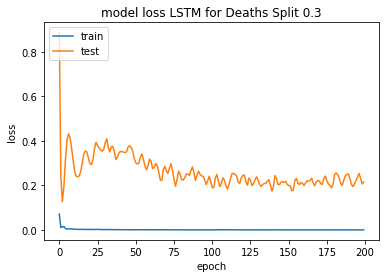

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.3,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss LSTM for Deaths Split 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 0.2879 - val_loss: 0.3699
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0237 - val_loss: 0.0142
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0065 - val_loss: 0.0192
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0093 - val_loss: 0.0121
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0071 - val_loss: 1.4078e-04
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 5.5021e-04 - val_loss: 0.0036
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 9/200
7/7 [==============================] - 0s 9ms/step - loss: 3.0397e-04 - val_loss: 4.0819e-04
Epoch 10/200
7/7 [==============================] - 0s 9ms/step - loss: 1.8551e-04 - val_loss: 1.5364e-04
E

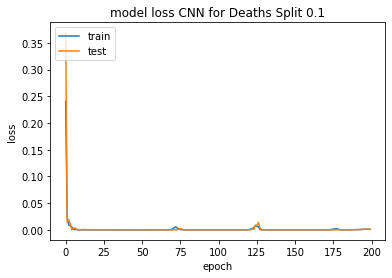

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss CNN for Deaths Split 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/200
7/7 [==============================] - 2s 50ms/step - loss: 0.1529 - val_loss: 1.1709
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1405 - val_loss: 1.1243
Epoch 3/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1343 - val_loss: 1.0706
Epoch 4/200
7/7 [==============================] - 0s 16ms/step - loss: 0.1282 - val_loss: 1.0104
Epoch 5/200
7/7 [==============================] - 0s 16ms/step - loss: 0.1217 - val_loss: 0.9602
Epoch 6/200
7/7 [==============================] - 0s 15ms/step - loss: 0.1140 - val_loss: 0.8903
Epoch 7/200
7/7 [==============================] - 0s 17ms/step - loss: 0.1053 - val_loss: 0.8275
Epoch 8/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0955 - val_loss: 0.7810
Epoch 9/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0846 - val_loss: 0.7391
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0729 - val_loss: 0.6986
Epoch 11/200
7/7 [=

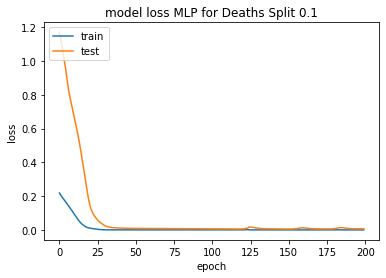

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

    # compile model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
X_train, y_train,
epochs=200,
batch_size=32,
validation_split=0.1,
shuffle=False
)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss MLP for Deaths Split 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()